In [7]:
import os
import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy.misc import toimage
from random import shuffle
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator #for data augmentation
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as k
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, Callback
from keras.applications.vgg16 import preprocess_input

In [3]:
df_labels = pd.read_csv('/media/prateeksha/Unit 3/SKIN-DATA/ISIC-2017_Training_Part3_GroundTruth.csv')

In [4]:
df_labels.head()

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0000000,0.0,0.0
1,ISIC_0000001,0.0,0.0
2,ISIC_0000002,1.0,0.0
3,ISIC_0000003,0.0,0.0
4,ISIC_0000004,1.0,0.0


In [5]:
train_path = '/media/prateeksha/Unit 3/SKIN-DATA/ISIC-2017_Training_Data part3'
labels = os.listdir(train_path)
len(labels)

2000

/media/prateeksha/Unit 3/SKIN-DATA/ISIC-2017_Training_Data part3/ISIC_0000000.jpg
/media/prateeksha/Unit 3/SKIN-DATA/ISIC-2017_Training_Data part3/ISIC_0000001.jpg
/media/prateeksha/Unit 3/SKIN-DATA/ISIC-2017_Training_Data part3/ISIC_0000002.jpg
/media/prateeksha/Unit 3/SKIN-DATA/ISIC-2017_Training_Data part3/ISIC_0000003.jpg
/media/prateeksha/Unit 3/SKIN-DATA/ISIC-2017_Training_Data part3/ISIC_0000004.jpg
/media/prateeksha/Unit 3/SKIN-DATA/ISIC-2017_Training_Data part3/ISIC_0000006.jpg
/media/prateeksha/Unit 3/SKIN-DATA/ISIC-2017_Training_Data part3/ISIC_0000007.jpg
/media/prateeksha/Unit 3/SKIN-DATA/ISIC-2017_Training_Data part3/ISIC_0000009.jpg
/media/prateeksha/Unit 3/SKIN-DATA/ISIC-2017_Training_Data part3/ISIC_0000010.jpg


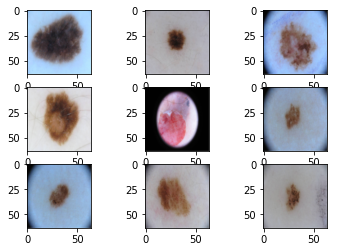

In [8]:
for i in range(0, 9):
    label = labels[i]
    cur_path = train_path + "/" + label
    print cur_path
    img = image.load_img(cur_path, target_size=(64,64))
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(img))
# show the plot
pyplot.show()


In [9]:
X_train = []
for i,img in enumerate(labels):
    path = os.path.join(train_path, img)
    img = image.load_img(path, target_size = (64,64))
    img = img_to_array(img)
    img=np.array(img) 
    img=preprocess_input(img)
    X_train.append(img)
    x_train = np.array(X_train)
    if i%250 == 0: print('Processed {} of {}'.format(i, 250))
    
print(x_train[0].shape)

Processed 0 of 250
Processed 250 of 250
Processed 500 of 250
Processed 750 of 250
Processed 1000 of 250
Processed 1250 of 250
Processed 1500 of 250
Processed 1750 of 250
(64, 64, 3)


In [11]:
df_labels.get_value(2, 'melanoma')

/home/prateeksha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


1.0

In [12]:
y_train = []
j = 0
for i in enumerate (df_labels['image_id']):
    if df_labels.get_value(j,'melanoma') == df_labels.get_value(j, 'seborrheic_keratosis'): num = 0
    if df_labels.get_value(j, 'melanoma') == 1: num = 1
    if df_labels.get_value(j, 'seborrheic_keratosis')== 1: num=2
    y_train.append(num)
    j = j+1
len(y_train)

/home/prateeksha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/prateeksha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/prateeksha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


2000

In [13]:
y_train = np.array(y_train)
y_train.shape

(2000,)

In [14]:
(trainX, testX, trainY, testY) = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42)

In [15]:

trainY.shape

(1500,)

In [16]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range = 0.1,shear_range = 0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

In [17]:
aug.fit(trainX)

In [18]:
img_rows, img_cols = 64, 64
if k.image_data_format() == 'channels_first':
    trainX = trainX.reshape(trainX.shape[0], 3, img_rows, img_cols)
    testX = testX.reshape(testX.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    trainX = trainX.reshape(trainX.shape[0], img_rows, img_cols, 3)
    testX = testX.reshape(testX.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [19]:
trainX.shape

(1500, 64, 64, 3)

In [20]:
trainX = keras.utils.normalize(trainX, axis=-1, order=2)

In [21]:
testX = keras.utils.normalize(testX, axis=-1, order=2)

In [22]:
trainY = keras.utils.to_categorical(trainY, num_classes = 3)
testY = keras.utils.to_categorical(testY, num_classes =3)

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(512, init ='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128, init = 'uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


/home/prateeksha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="uniform")`
/home/prateeksha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, kernel_initializer="uniform")`


In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape= input_shape))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(512, init ='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128, init ='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense( 3, activation = 'softmax')) # batchnorm shouldn't be applied at the last layer 


/home/prateeksha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="uniform")`
/home/prateeksha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, kernel_initializer="uniform")`


In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics =['accuracy'])

In [26]:
## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

#early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')        
        
def run_skindata():
    history = LossHistory()
    model.fit_generator(aug.flow(trainX, trainY, batch_size = 32 ), validation_data = (testX, testY), steps_per_epoch = len(trainX)//32, callbacks= [history], epochs = 10, verbose =1)
   
   

    #predictions = model.predict(test, verbose=0)
    return  history
history = run_skindata()

Epoch 1/10
46/46 [==============================] - 35s 752ms/step - loss: 1.3656 - acc: 0.4416 - val_loss: 1.0355 - val_acc: 0.6880
Epoch 2/10
46/46 [==============================] - 40s 868ms/step - loss: 1.0125 - acc: 0.6265 - val_loss: 0.9497 - val_acc: 0.7060
Epoch 3/10
46/46 [==============================] - 38s 816ms/step - loss: 1.0057 - acc: 0.6300 - val_loss: 1.0402 - val_acc: 0.6860
Epoch 4/10
46/46 [==============================] - 39s 853ms/step - loss: 0.9615 - acc: 0.6363 - val_loss: 0.9195 - val_acc: 0.6960
Epoch 5/10
46/46 [==============================] - 42s 908ms/step - loss: 0.9309 - acc: 0.6450 - val_loss: 0.8488 - val_acc: 0.6820
Epoch 6/10
46/46 [==============================] - 46s 998ms/step - loss: 0.9391 - acc: 0.6411 - val_loss: 0.7891 - val_acc: 0.7140
Epoch 7/10
46/46 [==============================] - 47s 1s/step - loss: 0.9133 - acc: 0.6591 - val_loss: 0.7946 - val_acc: 0.7080
Epoch 8/10
46/46 [==============================] - 54s 1s/step - loss: 

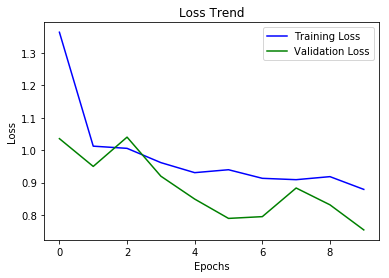

In [27]:
loss = history.losses
val_loss = history.val_losses

pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.title('Loss Trend')
pyplot.plot(loss, 'blue', label='Training Loss')
pyplot.plot(val_loss, 'green', label='Validation Loss')
pyplot.xticks(range(0,10)[0::2])
pyplot.legend()
pyplot.show()